In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn

In [2]:
cleaned_df = pd.read_csv('../data/satisfaction-data/satisfaction-data-clean.csv')

In [3]:
cleaned_df.loc[cleaned_df["Indicators"] == "Life satisfaction rating between 0 and 5", 'Rating'] = 2.5
cleaned_df.loc[cleaned_df["Indicators"] == "Life satisfaction rating of 6 or 7", 'Rating'] = 6.5
cleaned_df.loc[cleaned_df["Indicators"] == "Life satisfaction rating of 8, 9 or 10", 'Rating'] = 9

In [4]:
total_df = cleaned_df[(cleaned_df['Gender'] == 'Total, all persons') & (cleaned_df['GEO'] != 'Canada (excluding territories)')]

In [5]:
total_df['score'] = total_df['VALUE'] * total_df['Rating']/100

C:\Users\jocel\AppData\Local\Temp\ipykernel_102360\1378795955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['score'] = total_df['VALUE'] * total_df['Rating']/100


In [6]:
total_df = total_df.groupby(['GEO', 'REF_DATE'])['score'].sum().reset_index(name ='Satisfaction Score')

In [7]:
satisfaction_score = total_df.groupby('GEO')['Satisfaction Score'].mean().reset_index(name ='Satisfaction Score')

In [8]:
satisfaction_score = satisfaction_score.rename(columns={'GEO':'Province'})

In [9]:
sentiment_score_annual = pd.read_csv('../data/sentiment_score.csv')

In [10]:
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'Manitoba', 'Province'] = 'Manitoba'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'NovaScotia', 'Province'] = 'Nova Scotia'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'PEI', 'Province'] = 'Prince Edward Island'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'alberta', 'Province'] = 'Alberta'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'britishcolumbia', 'Province'] = 'British Columbia'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'newbrunswickcanada', 'Province'] = 'New Brunswick'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'newfoundland', 'Province'] = 'Newfoundland and Labrabdor'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'ontario', 'Province'] = 'Ontario'
sentiment_score_annual.loc[sentiment_score_annual['subreddit'] == 'saskatchewan', 'Province'] = 'Saskatchewan'

In [11]:
sentiment_score_annual = sentiment_score_annual[sentiment_score_annual['year'] == 2022]

In [12]:
sentiment_score_annual = sentiment_score_annual[sentiment_score_annual['Province'] != 'nan']

In [13]:
sentiment_score_annual = sentiment_score_annual.drop(columns=['year'])

In [14]:
sentiment_scores = sentiment_score_annual.rename(columns={'score':'Sentiment Score'})

In [15]:
merged = sentiment_scores.merge(satisfaction_score, on='Province')

In [16]:
line = stats.linregress(merged['Sentiment Score'], merged['Satisfaction Score'])

In [17]:
merged['prediction'] = line.intercept + line.slope*merged['Sentiment Score']

In [18]:
line

LinregressResult(slope=1.9990536812600275, intercept=6.340464849925753, rvalue=0.48881449621846695, pvalue=0.21900395273690554, stderr=1.4565128271532044, intercept_stderr=0.47740716846914844)

<Figure size 640x480 with 0 Axes>

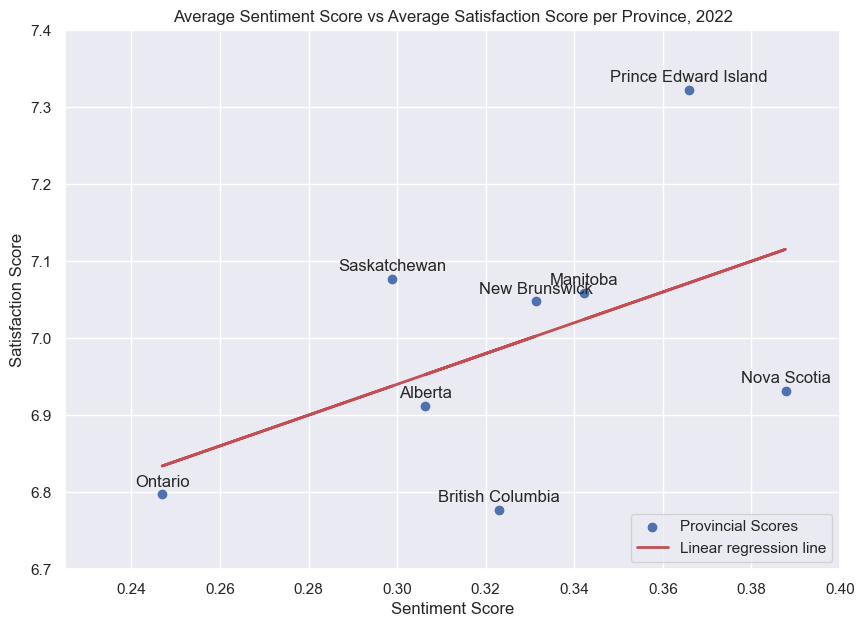

In [20]:
seaborn.set()
plt.figure()
fig, ax = plt.subplots()
ax.scatter(merged['Sentiment Score'], merged['Satisfaction Score'])
fig.set_figheight(7)
fig.set_figwidth(10)
ax.set_title('Average Sentiment Score vs Average Satisfaction Score per Province, 2022')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Satisfaction Score')
ax.set_ylim(6.7, 7.4)
ax.set_xlim(0.225,0.4)

for i, txt in enumerate(merged['Province']):
    ax.annotate(txt, (merged['Sentiment Score'][i], merged['Satisfaction Score'][i]), ha='center', xytext=((merged['Sentiment Score'][i], merged['Satisfaction Score'][i]+0.01)))

ax.plot(merged['Sentiment Score'], merged['prediction'], 'r-', linewidth=2)
ax.legend(['Provincial Scores', 'Linear regression line'],loc='lower right')
plt.savefig('../plots/sentiment_score_vs_satisfaction_score')